In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
df = pd.read_csv('cardio_train.csv',sep=';')

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df.shape

(70000, 13)

In [5]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.isnull().values.any()

False

In [8]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

/home/user/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

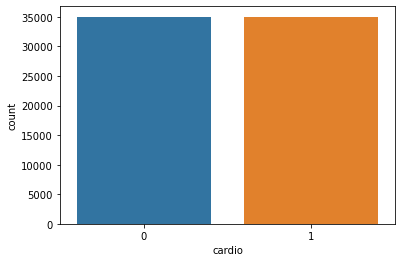

In [9]:
seaborn.countplot(df['cardio'])

<AxesSubplot:xlabel='gender', ylabel='count'>

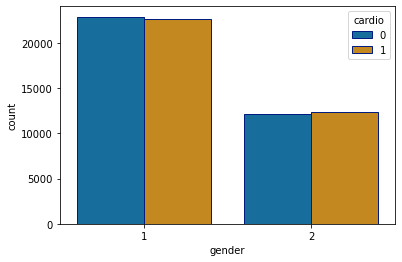

In [10]:
seaborn.countplot(x='gender',hue='cardio',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

In [ ]:
seaborn.countplot(x='age',hue='cardio',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

In [ ]:
df['yr'] = (df['age']/365).round()

In [ ]:
df['yr']

In [ ]:
seaborn.countplot(x='yr',hue='cardio',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

# Details about data set

In [ ]:
df.describe()

# Co-relation 

In [ ]:
df.corr()

In [ ]:
df = df.drop(['yr'],axis=1)

In [ ]:
x = df.iloc[:,:-1]

In [ ]:
y = df.iloc[:,12]

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
FIT_FEATURE=SelectKBest(score_func=f_classif)

In [ ]:
FIT_FEATURE.fit(x,y)

In [ ]:
df

In [ ]:
SCORE_COL=pd.DataFrame(FIT_FEATURE.scores_,columns = ['Score value'])

In [ ]:
SCORE_COL

In [ ]:
NAME_COL = pd.DataFrame(x.columns)

In [ ]:
NAME_COL

In [ ]:
top_feature = pd.concat([NAME_COL,SCORE_COL],axis=1)

In [ ]:
top_feature

In [ ]:
top_feature.nlargest(8,'Score value')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=1)

In [ ]:
xtrain

# Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Rclf = RandomForestClassifier()

In [ ]:
Rclf.fit(xtrain,ytrain)

In [ ]:
Rclf.score(xtest,ytest)

# Using Decision Tree Classifier

In [ ]:
#from sklearn.tree import DecisionTreeClassifier

In [ ]:
#clf =DecisionTreeClassifier()

In [ ]:
#clf.fit(xtrain,ytrain)

In [ ]:
#clf.score(xtest,ytest)

# Save Machine Learning Modes